In [63]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

url = 'clean_airbnb_df.csv'
df = pd.read_csv(url)

In [64]:
# Separate the columns
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

In [65]:
numericals_df = numericals_df.drop(['Unnamed: 0', 'id'], axis=1)
numericals_df

,accommodates,bathrooms,beds,price,number_of_reviews,review_scores_rating
0,2,1.0,1,3390.0,0,0.00
1,14,5.5,8,18000.0,64,4.58
2,2,1.5,1,3350.0,221,4.90
3,2,1.0,1,339.0,6,4.83
4,2,1.5,2,1273.0,22,4.67
...,...,...,...,...,...,...
25705,2,1.0,1,970.0,0,0.00
25706,2,1.0,1,175.0,0,0.00
25707,5,2.0,3,1166.0,0,0.00
25708,2,1.0,1,286.0,0,0.00


## Categorical

In [66]:
# Create new Dataframes splitt in nominal and ordinal
nominal_columns = ['superhost', 'neighbourhood', 'room_type']
nominal_df = categoricals_df[nominal_columns]

In [67]:
# get_dummies with all the norminal columns
con_norminals_df = pd.get_dummies(nominal_df, dtype=int)
con_norminals_df

,superhost_f,superhost_t,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,...,neighbourhood_Milpa Alta,neighbourhood_Tlalpan,neighbourhood_Tláhuac,neighbourhood_Venustiano Carranza,neighbourhood_Xochimilco,neighbourhood_Álvaro Obregón,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25705,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25706,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25707,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25708,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
# Concat the two categorical Dataframes

result_categorical_df = con_norminals_df
result_categorical_df

,superhost_f,superhost_t,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,...,neighbourhood_Milpa Alta,neighbourhood_Tlalpan,neighbourhood_Tláhuac,neighbourhood_Venustiano Carranza,neighbourhood_Xochimilco,neighbourhood_Álvaro Obregón,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25705,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25706,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25707,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25708,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Numberical

## Concat both

In [69]:
final_df = pd.concat([result_categorical_df, numericals_df], axis=1)
final_df

,superhost_f,superhost_t,neighbourhood_Azcapotzalco,neighbourhood_Benito Juárez,neighbourhood_Coyoacán,neighbourhood_Cuajimalpa de Morelos,neighbourhood_Cuauhtémoc,neighbourhood_Gustavo A. Madero,neighbourhood_Iztacalco,neighbourhood_Iztapalapa,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,accommodates,bathrooms,beds,price,number_of_reviews,review_scores_rating
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,2,1.0,1,3390.0,0,0.00
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,14,5.5,8,18000.0,64,4.58
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,2,1.5,1,3350.0,221,4.90
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,2,1.0,1,339.0,6,4.83
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,2,1.5,2,1273.0,22,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25705,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,2,1.0,1,970.0,0,0.00
25706,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,2,1.0,1,175.0,0,0.00
25707,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,5,2.0,3,1166.0,0,0.00
25708,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,2,1.0,1,286.0,0,0.00


### X-y Splitt

In [70]:
final_df.columns

Index(['superhost_f', 'superhost_t', 'neighbourhood_Azcapotzalco',
       'neighbourhood_Benito Juárez', 'neighbourhood_Coyoacán',
       'neighbourhood_Cuajimalpa de Morelos', 'neighbourhood_Cuauhtémoc',
       'neighbourhood_Gustavo A. Madero', 'neighbourhood_Iztacalco',
       'neighbourhood_Iztapalapa', 'neighbourhood_La Magdalena Contreras',
       'neighbourhood_Miguel Hidalgo', 'neighbourhood_Milpa Alta',
       'neighbourhood_Tlalpan', 'neighbourhood_Tláhuac',
       'neighbourhood_Venustiano Carranza', 'neighbourhood_Xochimilco',
       'neighbourhood_Álvaro Obregón', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'accommodates', 'bathrooms', 'beds', 'price',
       'number_of_reviews', 'review_scores_rating'],
      dtype='object')

In [71]:
X = final_df.drop(columns=['price'])
y = final_df[['price']]

### Train test split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

In [73]:
# MinMaxScaler X_train
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [74]:
# MinMaxScaler X_test
X_test = scaler.transform(X_test)

In [75]:
#PowerTransform y_train
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)

In [76]:
#PowerTransform y_test
X_test = pt.transform(X_test)

In [77]:
#PowerTransform y_train
pt = PowerTransformer()
y_train = pt.fit_transform(y_train)

In [78]:
#PowerTransform y_test
y_test = pt.transform(y_test)

### Apply linear regression

In [79]:
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [80]:
model.coef_

array([[-7.34717311e+08, -7.34717311e+08, -5.52881851e+12,
        -5.52881851e+12, -5.52881851e+12, -5.52881851e+12,
        -5.52881851e+12, -5.52881851e+12, -5.52881851e+12,
        -5.52881851e+12, -5.52881851e+12, -5.52881851e+12,
        -5.52881851e+12, -5.52881851e+12, -5.52881851e+12,
        -5.52881851e+12, -5.52881851e+12, -5.52881851e+12,
        -2.30468638e+12, -2.30468638e+12, -2.30468638e+12,
        -2.30468638e+12,  2.58278527e+00,  4.28134030e+00,
        -2.31579693e+00, -1.13305079e+00, -2.91996350e-01]])

In [81]:
model.intercept_

array([7.83423961e+12])

### Create predictions for the test set

In [82]:
y_pred = model.predict(X_test)

In [83]:
# inverse transforming predictions
pt.inverse_transform(y_pred)

C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[ 885.5591785 ],
       [1254.52736515],
       [ 609.02628429],
       ...,
       [ 611.98722745],
       [ 609.02628429],
       [1087.3585012 ]])

In [84]:
y_pred = pd.DataFrame(y_pred)

In [85]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

In [86]:
y_test = y_test.rename(columns={0: 'y_test'})

In [87]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [88]:
residuals_df = residuals_df.rename(columns={0: 'y_pred'})

In [89]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [90]:
residuals_df

,y_test,y_pred,residual
0,0.545807,-0.100586,0.646392
1,0.448461,0.334961,0.113500
2,-1.660218,-0.607422,-1.052796
3,-0.726869,-0.310547,-0.416322
4,-1.973058,-0.979492,-0.993566
...,...,...,...
6423,0.356282,0.111328,0.244954
6424,0.317030,0.176758,0.140272
6425,0.440747,-0.600586,1.041332
6426,-0.155607,-0.607422,0.451815


### Calculating metrics

In [91]:
mean_error = residuals_df['residual'].mean()
mean_error

-0.014894514276888086

In [92]:

mse(y_test, y_pred)

0.5053646710913462

In [93]:
np.sqrt(mse(y_test, y_pred))

0.7108900555580632

In [94]:
rmse = mse(y_test, y_pred, squared=False)
rmse

0.7108900555580632

### Computing R2_score for test_set

In [95]:
r2_test = round(r2_score(y_test, y_pred), 2)
r2_test

0.5

### Computing R2_score for train_set

In [96]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.48

### Test

In [97]:
features_names = list(X)
features_names

['superhost_f',
 'superhost_t',
 'neighbourhood_Azcapotzalco',
 'neighbourhood_Benito Juárez',
 'neighbourhood_Coyoacán',
 'neighbourhood_Cuajimalpa de Morelos',
 'neighbourhood_Cuauhtémoc',
 'neighbourhood_Gustavo A. Madero',
 'neighbourhood_Iztacalco',
 'neighbourhood_Iztapalapa',
 'neighbourhood_La Magdalena Contreras',
 'neighbourhood_Miguel Hidalgo',
 'neighbourhood_Milpa Alta',
 'neighbourhood_Tlalpan',
 'neighbourhood_Tláhuac',
 'neighbourhood_Venustiano Carranza',
 'neighbourhood_Xochimilco',
 'neighbourhood_Álvaro Obregón',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'accommodates',
 'bathrooms',
 'beds',
 'number_of_reviews',
 'review_scores_rating']

In [98]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

In [99]:
fi_dict = {'name':features_names, 'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,superhost_f,-7.347173e+08
1,superhost_t,-7.347173e+08
2,neighbourhood_Azcapotzalco,-5.528819e+12
3,neighbourhood_Benito Juárez,-5.528819e+12
4,neighbourhood_Coyoacán,-5.528819e+12
5,neighbourhood_Cuajimalpa de Morelos,-5.528819e+12
6,neighbourhood_Cuauhtémoc,-5.528819e+12
7,neighbourhood_Gustavo A. Madero,-5.528819e+12
8,neighbourhood_Iztacalco,-5.528819e+12
9,neighbourhood_Iztapalapa,-5.528819e+12


In [100]:
fi_df = fi_df.sort_values(by='coeff', ascending=False)

<Axes: xlabel='coeff', ylabel='name'>

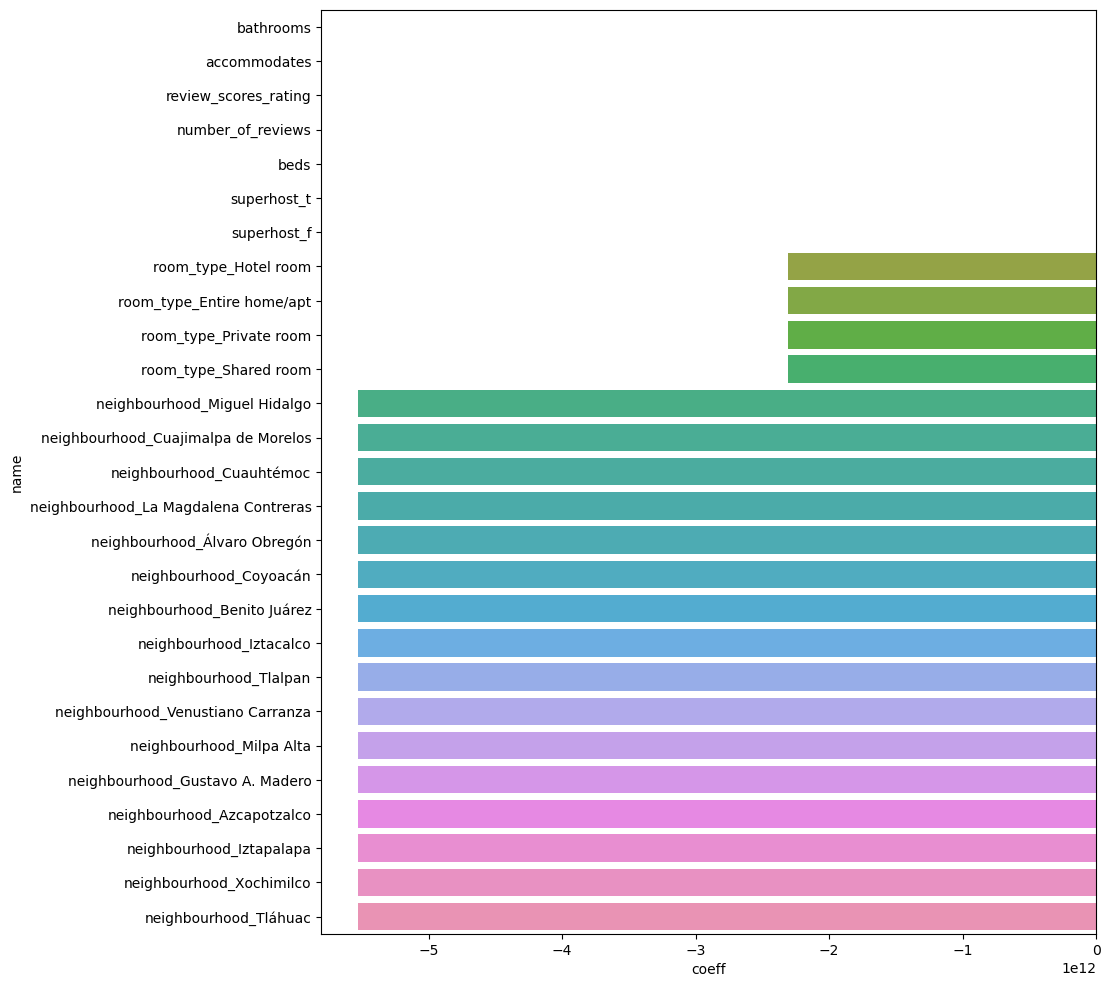

In [101]:
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])